Out1 Dominant Frequency: 0.47612135288140517 Hz
Out2 Dominant Frequency: 0.23780487804878048 Hz
Out3 Dominant Frequency: 0.0 Hz


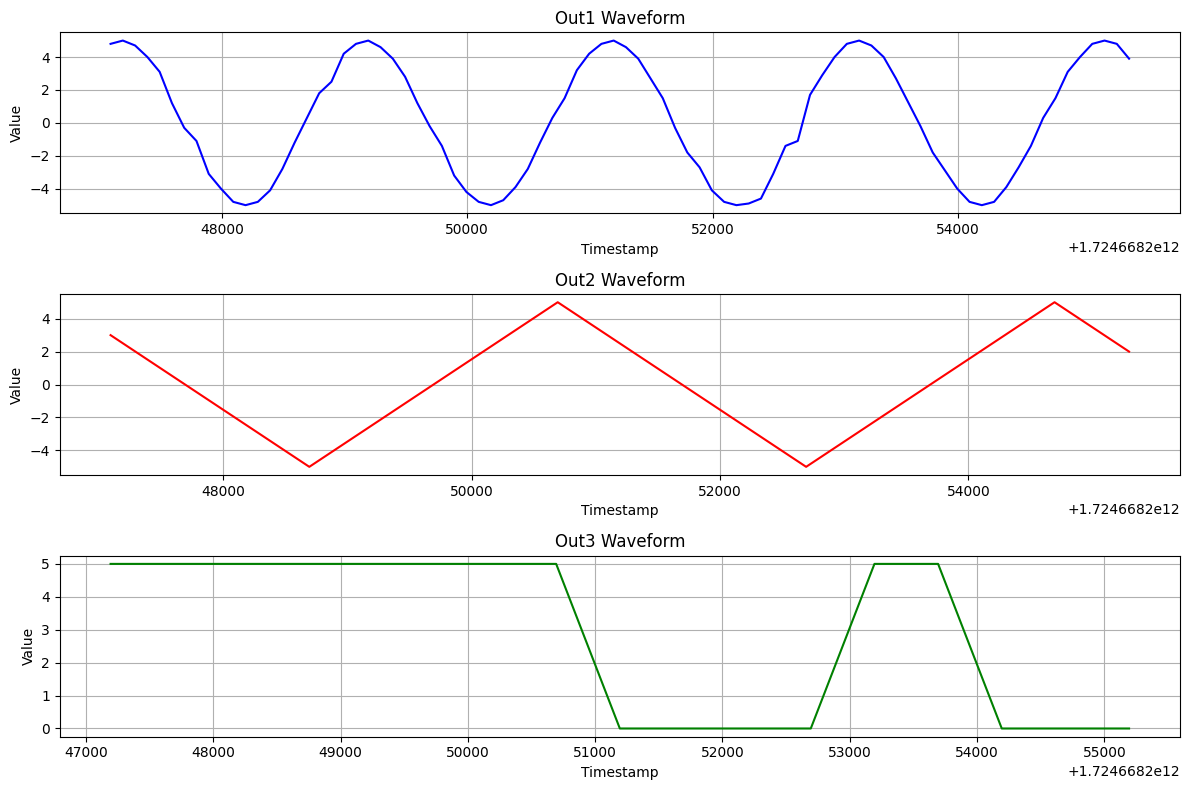

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
timestamps_out1 = []
out1_values = []
timestamps_out2 = []
out2_values = []
timestamps_out3 = []
out3_values = []

try:
    with open('data.json', 'r') as file:
        for line in file:
            json_data = json.loads(line)
            if json_data["out1"] != "--":
                timestamps_out1.append(json_data["timestamp"])
                out1_values.append(float(json_data["out1"]))
            if json_data["out2"] != "--":
                timestamps_out2.append(json_data["timestamp"])
                out2_values.append(float(json_data["out2"]))
            if json_data["out3"] != "--":
                timestamps_out3.append(json_data["timestamp"])
                out3_values.append(float(json_data["out3"]))
except FileNotFoundError:
    print("The file 'data.json' was not found.")
    exit(1)

# Calculate the dominant frequency using Fourier analysis
def calculate_dominant_frequency(timestamps, values):
    if not timestamps or not values:
        return None
    # Compute the time step
    dt = np.mean(np.diff(timestamps)) / 1000  # Convert milliseconds to seconds
    if dt <= 0:
        return None  # Return None if the time step is not valid
    # Perform FFT
    spectrum = np.fft.fft(values)
    # Compute the frequency axis
    freq = np.fft.fftfreq(len(values), d=dt)
    # Find the dominant frequency component
    idx = np.argmax(np.abs(spectrum))
    dominant_freq = freq[idx]
    return abs(dominant_freq)

# Calculate dominant frequency for each waveform
out1_frequency = calculate_dominant_frequency(timestamps_out1, out1_values)
out2_frequency = calculate_dominant_frequency(timestamps_out2, out2_values)
out3_frequency = calculate_dominant_frequency(timestamps_out3, out3_values)

print("Out1 Dominant Frequency:", out1_frequency, "Hz")
print("Out2 Dominant Frequency:", out2_frequency, "Hz")
print("Out3 Dominant Frequency:", out3_frequency, "Hz")

# Plotting
plt.figure(figsize=(12, 8))

# Plot for out1
plt.subplot(3, 1, 1)
if timestamps_out1 and out1_values:
    plt.plot(timestamps_out1, out1_values, color='blue')
    plt.title('Out1 Waveform')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'No valid data for Out1', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Plot for out2
plt.subplot(3, 1, 2)
if timestamps_out2 and out2_values:
    plt.plot(timestamps_out2, out2_values, color='red')
    plt.title('Out2 Waveform')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'No valid data for Out2', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Plot for out3
plt.subplot(3, 1, 3)
if timestamps_out3 and out3_values:
    plt.plot(timestamps_out3, out3_values, color='green')
    plt.title('Out3 Waveform')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'No valid data for Out3', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
